In [2]:
import os
import random
import shutil
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
import pandas as pd
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [3]:
def split_dir_to_train_test_val(directory = "asl_dataset/",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):
  """
  Creates 3 folders for Train, Test and Validation data
  """
  
  directory = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + "/" + directory
  print(directory)
  print(os.walk(directory))

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)

      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:

        # Copy  files
        dest_dir = "files/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:
        # Copy  files
        dest_dir = "files/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:

        # Copy  files
        dest_dir = "files/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")

split_dir_to_train_test_val()

/Users/ambarchakraborty/Documents/Projects/Real_Time_Sign_Language_Detection/asl_dataset/
<generator object _walk at 0x2c5c30ea0>
Folder r. Train data copied. 49 files
Folder r. Test data copied. 13 files
Folder r. Validation data copied. 8 files
Folder u. Train data copied. 49 files
Folder u. Test data copied. 13 files
Folder u. Validation data copied. 8 files
Folder 9. Train data copied. 49 files
Folder 9. Test data copied. 13 files
Folder 9. Validation data copied. 8 files
Folder 0. Train data copied. 49 files
Folder 0. Test data copied. 13 files
Folder 0. Validation data copied. 8 files
Folder 7. Train data copied. 49 files
Folder 7. Test data copied. 13 files
Folder 7. Validation data copied. 8 files
Folder i. Train data copied. 49 files
Folder i. Test data copied. 13 files
Folder i. Validation data copied. 8 files
Folder n. Train data copied. 49 files
Folder n. Test data copied. 13 files
Folder n. Validation data copied. 8 files
Folder g. Train data copied. 49 files
Folder g. Tes

In [4]:
def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """

  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names

In [5]:
print(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

/Users/ambarchakraborty/Documents/Projects/Real_Time_Sign_Language_Detection


In [6]:
class_names = get_class_names_from_folder("files/train/")
print(class_names)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h'
 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


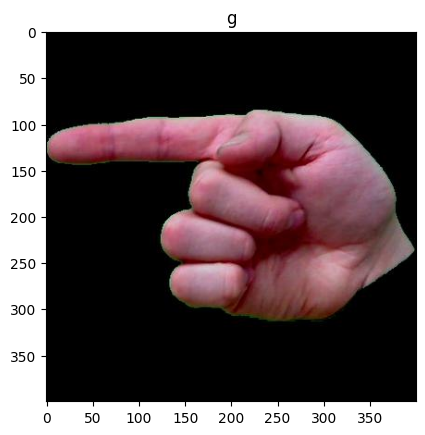

In [7]:
def visualize_random_image(target_dir, target_class):
  """
  Visualises random image from exact directory
  """
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("files/test/", "g")

In [8]:
train_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)
val_datagen = ImageDataGenerator(rescale=1/255.0)

train_data = train_datagen.flow_from_directory(directory="files/train",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="files/test",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="files/validation",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

tf.random.set_seed(42)

# Create model
model = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(240, 240, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(36, activation="softmax")
])

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])


Found 1760 images belonging to 36 classes.
Found 468 images belonging to 36 classes.
Found 287 images belonging to 36 classes.


In [9]:
history = model.fit(train_data,batch_size=32,epochs=3,
                    steps_per_epoch=len(train_data),
                    validation_data=validation_data,
                    validation_steps=len(validation_data))

Epoch 1/3
55/55 [==============================] - 20s 364ms/step - loss: 1.3407 - accuracy: 0.6500 - val_loss: 0.4166 - val_accuracy: 0.8676
Epoch 2/3
55/55 [==============================] - 19s 353ms/step - loss: 0.1847 - accuracy: 0.9420 - val_loss: 0.2004 - val_accuracy: 0.9443
Epoch 3/3
55/55 [==============================] - 19s 344ms/step - loss: 0.0575 - accuracy: 0.9858 - val_loss: 0.1611 - val_accuracy: 0.9617


15/15 [==============================] - 2s 136ms/step - loss: 0.0983 - accuracy: 0.9679


<Axes: >

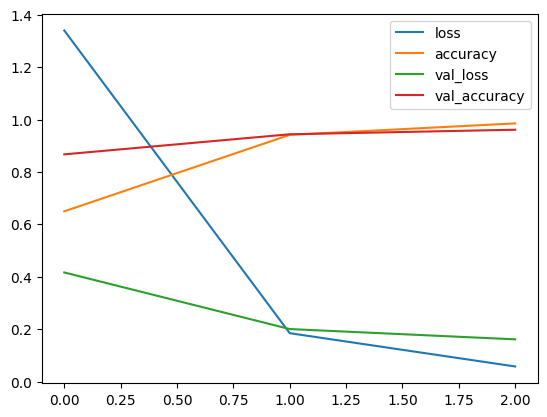

In [10]:
model.evaluate(test_data)
pd.DataFrame(history.history).plot()

In [11]:
def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)

  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

image = load_and_resize_image("../asl_dataset/0/hand1_0_bot_seg_1_cropped.jpeg", 240)

In [13]:
pred = model.predict(tf.expand_dims(image, axis=0))
class_names[pred[0].argmax()]

1/1 [==============================] - 0s 18ms/step


'0'

In [14]:
model.save('model.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
print('''
tensorflowjs_converter --input_format=keras model/model.h5 model/model_json/model 
''')

import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model,'..')

## Convert the model into json


tensorflowjs_converter --input_format=keras model/model.h5 model/model_json/model 



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
